Add your written answers here

In [1]:
#Barış Bilen
#########################
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import copy
#import any other  modules that you wish
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################


# Add your comments as markdown cells(This is a markdown cell).

## To add a markdown cell, simply click on a cell, then click on the 'Cell' tab above, change 'Cell Type' to 'Markdown'

Then add your comment! To view the format of this markdown cell, double click on here.

### Note: We provide you with example codes for starter, but feel free to delete anything we provide and write your own code, as long as you use allowed libraries and modules. 

# Part A: Simulate exponential and free-scale networks

## 1.Weighted Erdos-Renyi Generative Model

ER generative model generates a network simply by selecting an edge creating probability between nodes. After an edge created it appends a weight to that edge. Lets say probability is choosen 0.5, it means that a node has a 50 percent chance to connect with any other node in the network if it is connected to another node then a weight is assigned to the edge. By applying this to all nodes a network is created.

## 2.Key properties of Erdos-Renyi Graphs

Probability of p represents average links between nodes. Centrality of nodes are similiar to each other. If probability p is high then they will become highly connected graphs which makes them resiliant to failures and attacks.

## 3.Weighted Scale Free Generative Algorithm

SF generative model generates a network by selecting connection value(M) for nodes. Most of the nodes have similar connection values except some of the nodes, those will have very high connectivity. If a node connects to any other node then a weight is assinged to that edge. To give an example, lets say M = 2. This means most of the nodes have a connection with 2 other nodes. Exceptionally some nodes(hub nodes) will highly connectivity to create a network

## 4.Key properties of Scale Free Graphs

Scale Free Graphs node degree distribution follows a power low so centrality of nodes in this graph is not even. Most of the nodes have low centrality and some nodes have a very highy centrality which makes this graphs vulnerable to targeted attacks. Even in some situations when a random failure happens in one of the highly connected nodes.

In [2]:
#Implement Part A

### Erdos-Renyi Weighted Graphs

In [3]:
def erdos_remyi_graph_generate(N,p):
    ER_Graph = nx.erdos_renyi_graph(N,p)
    for u,v,d in ER_Graph.edges(data = True):
        d["weight"] = random.randint(1,10)   #Adding weights to edges
    return ER_Graph

### Scale Free Weighted Graphs

In [4]:
def scale_free_graph_generate(N,M):
    SF_Graph = nx.barabasi_albert_graph(N,M,seed=np.random.seed(1)) #One of many generation types of Scale Free graphs
    for u,v,d in SF_Graph.edges(data = True):
        d["weight"] = random.randint(1,10)  #Adding weights to edges
    return SF_Graph

### Strength Centrality

In [5]:
def strength_centrality(Graphs):
    strength_centrality = []
    for i in range(len(Graphs)):   #For every generated graphs strength centrality is calculated
        g = Graphs[i]        
        weight_val_sum = 0
        weight_list = []
        prev_node = 0
        first = True
        for u,v,d in g.edges(data = True):     #Calculating every nodes weight
            if(first):
                first = False
                prev_node = u
                weight_val_sum = d["weight"]
            elif(u == prev_node):
                weight_val_sum += d["weight"]    #Centrality of a weighted node is its sum of edge weights
            else:
                prev_node = u
                weight_list.append(weight_val_sum)
                weight_val_sum = d["weight"]
        strength_centrality += weight_list
    return strength_centrality

### Eigen Centrality

In [6]:
def eigen_centrality(Graphs):
    eigen_centrality = []
    for i in range(len(Graphs)):    #For every generated graphs eigen centrality is calculated
        g = Graphs[i]
        c = list(dict(nx.eigenvector_centrality(g, weight = "weight")).values())
        eigen_centrality += c
    return eigen_centrality

## PARAMETERS

In [7]:
###---HYPER PARAMETERS---###
Number_of_Graphs = 30      #For 30 ER networks and 30 SF networks
Number_of_Nodes = 200      #Number of nodes a network contains
#Probability for edge creation
Probability= 0.5
#Number of edges to attach from a new node to existing nodes
M_value = 2

## Creating Erdos-Renyi and Scale Free Graphs

In [8]:
Graphs_ER = []
for i in range(Number_of_Graphs):
    g = erdos_remyi_graph_generate(Number_of_Nodes,Probability)  
    Graphs_ER.append(g)

In [9]:
Graphs_SF = []
for i in range(Number_of_Graphs):
    g = scale_free_graph_generate(Number_of_Nodes,M_value)
    Graphs_SF.append(g)

## 5. Vizualization of Erdos-Renyi and Scale Free Graphs

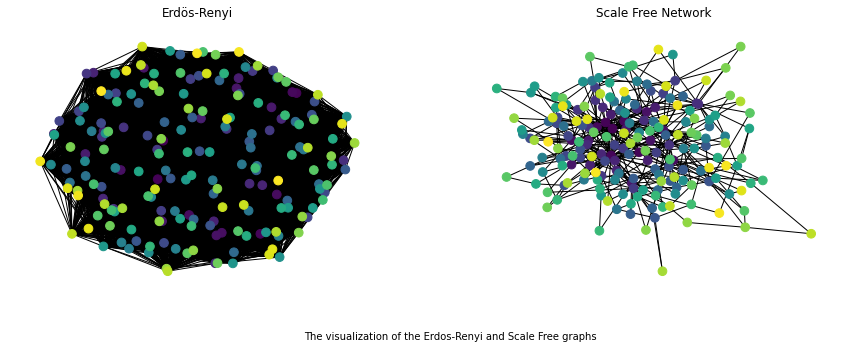

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax = axes.flatten()
ax[0].title.set_text(r"Erdös-Renyi")
ax[1].title.set_text(r"Scale Free Network")

networks = [Graphs_ER[random.randint(0,Number_of_Graphs-1)],Graphs_SF[random.randint(0,Number_of_Graphs-1)]]

for i in range(2):
    nx.draw(networks[i], ax=ax[i], node_color=range(Number_of_Nodes), node_size=75)
    ax[i].set_axis_off()

fig.text(.4,0,"The visualization of the Erdos-Renyi and Scale Free graphs")
plt.show()

## 6. Overlaid Distributions of the Node Strength Centrality

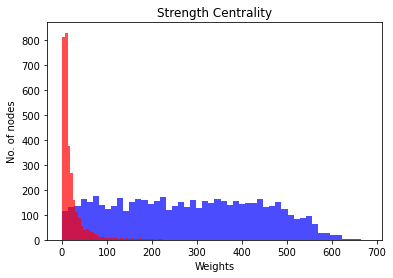

In [11]:
sc1= strength_centrality(Graphs_ER)
sc2= strength_centrality(Graphs_SF)

plt.hist(sc1, bins=50, color="blue", alpha = 0.7)
plt.hist(sc2, bins=50, color="red", alpha = 0.7)
plt.xlabel("Weights")
plt.ylabel("No. of nodes")
plt.title("Strength Centrality")
plt.show()

From above plot we can say that ER networks strength centrality shows that nodes are connected evenly. On the other hand SF networks have some nodes that highly connected and have a lot of nodes that barely connected

## 7. Overlaid Distributions of the Eigenvector Centrality

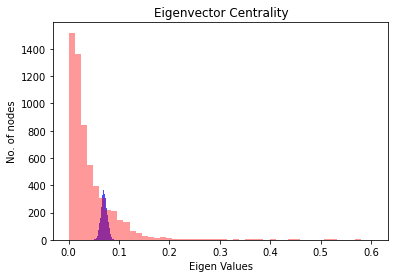

In [12]:
ec1= eigen_centrality(Graphs_ER)
ec2= eigen_centrality(Graphs_SF)

plt.hist(ec1, bins=50, color="blue", alpha = 0.7)
plt.hist(ec2, bins=50, color="red", alpha = 0.4)
plt.xlabel("Eigen Values")
plt.ylabel("No. of nodes")
plt.title("Eigenvector Centrality")
plt.show()

Eigen vector does not only compare how many connections a node have(quantity) it also compares connection value (quality) (might be connecting two different clusters). From above we can say that SF networks has a lot of low eigen valued nodes and some high values nodes because SF networks some nodes are highly connected and most nodes are not. For the ER networks we can see it is more scattered between nodes because all nodes have similar connections.

# Part B: Analyzing Erdos-Renyi and Scale-Free graphs in both random error and target attack scenarios

In [13]:
#Implement PART B:

## 1. findPercolationThreshold Function

In [14]:
def findPercolationThreshold(adjacency_matrix):
    matrixLength = len(adjacency_matrix)

    adjMat_strength = np.zeros(matrixLength)
    for i in range(matrixLength):
        adjMat_strength[i] = len(np.nonzero(adjacency_matrix[i])[0])
        
    emptyAdjecency_matrix = np.zeros([matrixLength,matrixLength]) #Creating an empty Adj. Mat.
    empMat_strength = np.zeros(matrixLength)
    
    #Starting from 0 we add highest strength nodes to the graph
    connected = True
    while connected:
        connectivityStrentg = np.argmax(adjMat_strength)
        emptyAdjecency_matrix[connectivityStrentg] = adjacency_matrix[connectivityStrentg]
        for i in range(matrixLength):
            emptyAdjecency_matrix[i][connectivityStrentg] = adjacency_matrix[i][connectivityStrentg]  #Connecting nodes 
        for j in range(matrixLength):
            empMat_strength[j] = len(np.nonzero(emptyAdjecency_matrix[j])[0])  #Recalculating strength 
        adjMat_strength[connectivityStrentg] = 0

        if 0 not in empMat_strength:   #Checking if a large component emerged or not
            connected = False
    
    #Calculating percolation by dividing large components node number to all graphs node number
    adjMat_edges = len(np.nonzero(adjacency_matrix)[1]) / 2
    empMat_edges = len(np.nonzero(emptyAdjecency_matrix)[1]) / 2
    connection_density = "{:.2f}".format(int(empMat_edges)/int(adjMat_edges))
    return connection_density

## 2.

We start by calculating connectivity strength of all nodes. After that starting from an empty adjacency matrix we add edges that have high connectivity strengt to the adjacency matrix until all nodes are connected. When all nodes are conecting we calculate connection denstiy. When this threshold achieved a large component emerges. 

## 3. largestConnectedComponent Function

In [15]:
## Source: https://www.geeksforgeeks.org/largest-connected-component-on-a-grid/
## I took an example from the code above and adopted/changed so it can give back LCC

def BFS(i, j, input, visited,count):
    matrixLength = len(visited)
    
    # Ending BFS if edge has no weight
    if(input[i][j] == 0):
        return visited, count

    visited[i][j] = input[i][j]
    visited[j][i] = input[j][i]
    count += 1

    # move coordinates on x and y axis
    x_move = [ 0, 0, 1, -1 ]
    y_move = [ 1, -1, 0, 0 ]

    # Looking all directions of the node. 
    #If there is any other connections we move to that node and do another BFS
    for u in range(4):
        if ((i + y_move[u] < matrixLength) and (j + x_move[u] < matrixLength) and (i + y_move[u]  >= 0) and (j + x_move[u] >= 0)):
            if(visited[i + y_move[u] ][j + x_move[u]] == 0):
                visited, count = BFS(i + y_move[u], j + x_move[u], input, visited,count)
    return visited, count

def largestConnectedComponent(adjacency_matrix):
    
    matrixLength = len(adjacency_matrix)
    visited = np.zeros([matrixLength,matrixLength])
    result = np.zeros([matrixLength,matrixLength])
    count = 0

    current_max = -10000000000

    for i in range(matrixLength):
        for j in range(matrixLength):
            visited = np.zeros([matrixLength,matrixLength])
            count = 0

            # From the beginning of Adj. Mat. looking right ad down cells for connections
            if (j + 1 < matrixLength or i + 1 < matrixLength):
                visited, count = BFS(i, j, adjacency_matrix,visited, count)

            # Updating the largest CC if there is a bigger one
            if (count >= current_max):
                current_max = count
                result = visited
    
    #Deleting not connected nodes
    deleteArray = []
    nonZeros_array = np.array(np.sum(result, axis=0))
    for i in range(len(nonZeros_array)):
        if nonZeros_array[i] == 0:
            deleteArray.append(i) 
    
    result= np.delete(result, deleteArray, 0)
    result=np.delete(result, deleteArray, 1)
    
    #If graphs is empty returns an empty graph
    if len(result) == 0:
        return nx.empty_graph(), 0, 0
    
    g = nx.from_numpy_array(result)
    diameter = nx.diameter(g)
    return g, len(result), diameter

## 4. 

largestConnectedComponent function looks through adjacency matrix to find connected components by vread first search. Checks every element in the adjacency matrix if there is an element that connected on to its right or down cell if there is then it start to do a bread first search looking for everydirection from the selected cell until there is no more cells left to go and updating adjacency matrix of the connected component. After finishing BFS it checks wheter found connected component bigger then the one found before if it is then it updates result adjacency matrix. After every cell is checked then resulted adjacency matrix trimed from not connected components and transformed in to a graph. Function returns this graph, its node number and its diameter.

## 5. Random Failure Function

In [16]:
def randomError(adjacency_matrix, fraction):
    matrixLength = len(adjacency_matrix)
    numberOfRemovedNodes = int(matrixLength * fraction)  #Calculating number of nodes o be removed
    selected = []
    for i in range(numberOfRemovedNodes):    #Removing process starts
        selectNew = True
        while(selectNew):
            removedNode = random.randint(0,matrixLength-1)   #Selecting a random node to remove
            if removedNode in selected: continue
            selected.append(removedNode)
            selectNew = False
        adjacency_matrix[removedNode] = 0     #Changing desired nodes edge weights to 0
        adjacency_matrix[:,removedNode] = 0   #Changing desired nodes edge weights to 0
        deleteArray = []
        
    #Removing desired node from Adj. Mat.
    nonZeros_array = np.array(np.sum(adjacency_matrix, axis=0))
    for i in range(len(nonZeros_array)):
        if nonZeros_array[i] == 0:
            deleteArray.append(i) 
    return adjacency_matrix

Firstly, we calculate the desired random number of nodes to be deleted from the adjacency matrix. For every selected node we make edge weights of those nodes to 0 to simulate its broken connection. After all random removels done we return the adjacency matrix.

## 6. Target Attack Function

In [17]:
def targetAttack(adjacency_matrix, fraction):
    matrixLength = len(adjacency_matrix)
    numberOfRemovedNodes = int(matrixLength * fraction)  #Calculating number of nodes o be removed

    for i in range(numberOfRemovedNodes):    #Removing process starts
        strengthList = np.array(np.sum(adjacency_matrix, axis=0))   #Calculating strength values of nodes
        removedNode = np.argmax(strengthList)       #Choosing most connected node
        adjacency_matrix[removedNode] = 0       #Changing desired nodes edge weights to 0
        adjacency_matrix[:,removedNode] = 0     #Changing desired nodes edge weights to 0
     
    #Removing desired node from Adj. Mat.
    deleteArray = []
    nonZeros_array = np.array(np.sum(adjacency_matrix, axis=0))
    for i in range(len(nonZeros_array)):
        if nonZeros_array[i] == 0:
            deleteArray.append(i) 
    return adjacency_matrix

Firstly, we calculate the desired number of nodes to be deleted. After that we calculate node strength and start removing from strongest nodes to weakest nodes simply by making those nodes edge weights 0 to simulate its broken connection. After removel of desired nodes we return adjacency matrix

## 7. 

In [18]:
###It does take a couple of minutes to run this cell###
ER_ajdMat = []
SF_ajdMat = []

for i in range(4):    #Selecting 4 different graphs 
    ER_ajdMat.append(np.array(nx.adjacency_matrix(Graphs_ER[random.randint(0,Number_of_Graphs-1)], weight="weight").toarray()))
    SF_ajdMat.append(np.array(nx.adjacency_matrix(Graphs_SF[random.randint(0,Number_of_Graphs-1)], weight="weight").toarray()))

ER_adjMat_copy = copy.deepcopy(np.array(ER_ajdMat))
SF_adjMat_copy = copy.deepcopy(np.array(SF_ajdMat))

diameter_graph = []
size_graph = []

remove = np.linspace(0,0.06,20)

for i in range(4):     #Calculating 4 different graphs Diameter and size values
    ER_diameterRF = []
    ER_diameterTA = []
    SF_diameterRF = []
    SF_diameterTA = []

    ER_sizeRF = []
    ER_sizeTA = []
    SF_sizeRF = []
    SF_sizeTA = []
    for j in range(len(remove)):
        ER_ajdMat_RF = randomError(ER_ajdMat[i],remove[j])
        g, node_size, diameterG= largestConnectedComponent(ER_ajdMat_RF)
        ER_diameterRF.append(diameterG)
        ER_sizeRF.append(node_size)

        ER_ajdMat_TA = targetAttack(ER_ajdMat[i],remove[j])
        g, node_size, diameterG= largestConnectedComponent(ER_ajdMat_TA)
        ER_diameterTA.append(diameterG)
        ER_sizeTA.append(node_size)

        SF_ajdMat_RF = randomError(SF_ajdMat[i],remove[j])
        g, node_size, diameterG= largestConnectedComponent(SF_ajdMat_RF)
        SF_diameterRF.append(diameterG)
        SF_sizeRF.append(node_size)

        SF_ajdMat_TA = targetAttack(SF_ajdMat[i],remove[j])
        g, node_size, diameterG= largestConnectedComponent(SF_ajdMat_TA)
        SF_diameterTA.append(diameterG)
        SF_sizeTA.append(node_size)
    diameter_graph.append([ER_diameterRF,ER_diameterTA,SF_diameterRF,SF_diameterTA])
    size_graph.append([ER_sizeRF,ER_sizeTA,SF_sizeRF,SF_sizeTA])

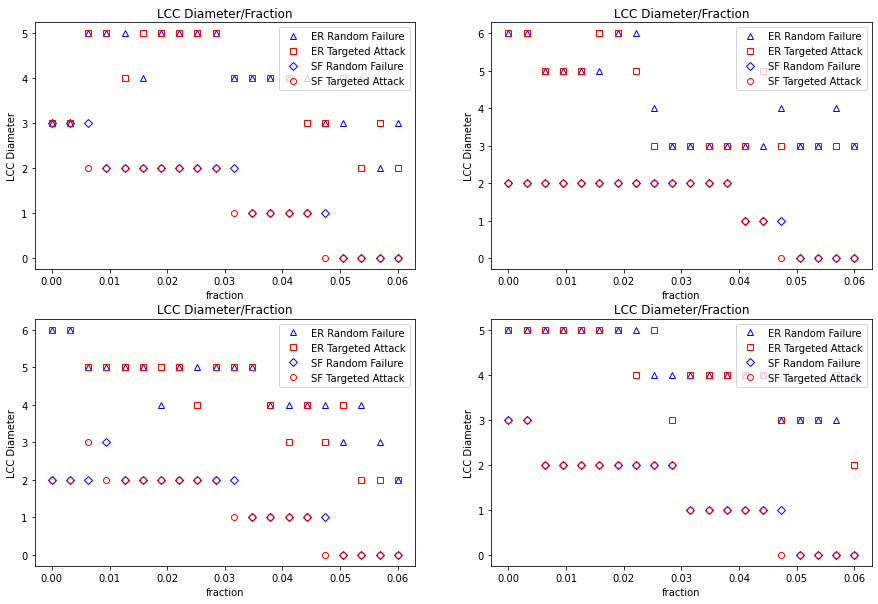

In [19]:
figure, axis = plt.subplots(2, 2,figsize=(15,10))
x, y  = 0, 0
for i in range(4):
    if i == 2:
        x = 1
        y = 0
    axis[x,y].plot(remove, diameter_graph[i][0], marker="^", linestyle ="None", mfc= "none", mec = "b", label="ER Random Failure")
    axis[x,y].plot(remove, diameter_graph[i][1], marker= "s", linestyle ="None",mfc= "none",mec = "r", label="ER Targeted Attack")
    axis[x,y].plot(remove, diameter_graph[i][2], marker="D", linestyle ="None", mfc= "none", mec = "b", label="SF Random Failure")
    axis[x,y].plot(remove, diameter_graph[i][3], marker= "o", linestyle ="None",mfc= "none",mec = "r", label="SF Targeted Attack")
    axis[x,y].legend(loc="upper right")
    axis[x,y].set_title("LCC Diameter/Fraction")
    axis[x,y].set_xlabel("fraction")
    axis[x,y].set_ylabel("LCC Diameter")
    y += 1

plt.show()

## 8. 

# ER and SF Random Failure

We can say that random failures does not change the diameter of the networks too much. Especially for ER networks becasue they are resiliant. We can say that SF networks are somewhat resilitant excepiton of if one of the failures happens on a centered node then it effects the diameter of that graph. My graphs are not perfect but according to these graphs i can say that it does in line with the paper.

# ER and SF Target Attacks

In targeted attacks for ER networks diameters does not change or changes slightly because of their resilians to targeted attacks. So we can say that ER networks line with the paper. For SF networks we expect change in diameter after targeted attacks but according to my graph outcomes there is no change or a minimal change so we can say that SF sarget attacks does not line with the paper. 

## 9.

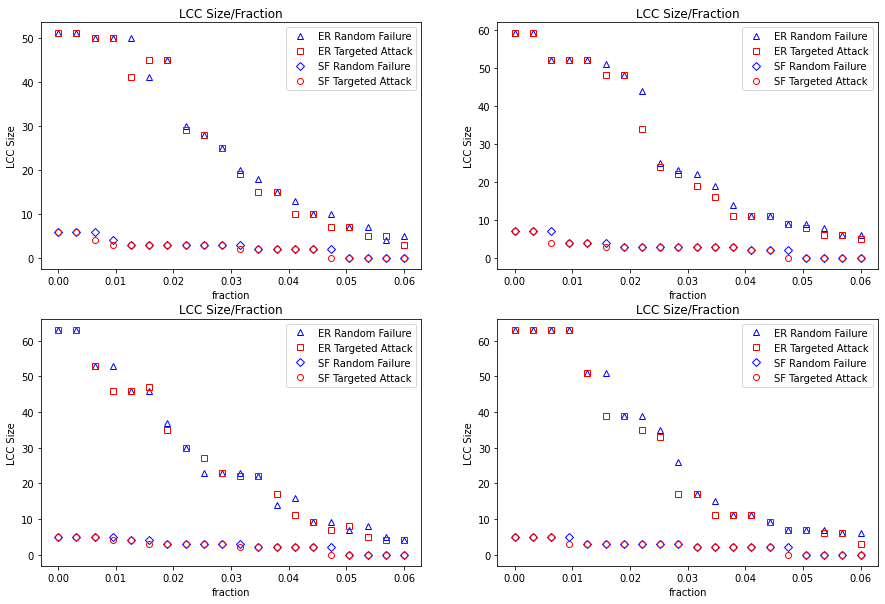

In [20]:
figure, axis = plt.subplots(2, 2,figsize=(15,10))
x, y  = 0, 0
for i in range(4):
    if i == 2:
        x = 1
        y = 0
    axis[x,y].plot(remove, size_graph[i][0], marker="^", linestyle ="None", mfc= "none", mec = "b", label="ER Random Failure")
    axis[x,y].plot(remove, size_graph[i][1], marker= "s", linestyle ="None",mfc= "none",mec = "r", label="ER Targeted Attack")
    axis[x,y].plot(remove, size_graph[i][2], marker="D", linestyle ="None", mfc= "none", mec = "b", label="SF Random Failure")
    axis[x,y].plot(remove, size_graph[i][3], marker= "o", linestyle ="None",mfc= "none",mec = "r", label="SF Targeted Attack")
    axis[x,y].set_title("LCC Size/Fraction")
    axis[x,y].set_xlabel("fraction")
    axis[x,y].set_ylabel("LCC Size")
    axis[x,y].legend(loc="upper right")
    y += 1

plt.show()

## 10.

# ER and SF Random Failure

We can say that ER networks are resilliant to random networks failures because of their highly connected nodes but for SF netwroks it might depend on where the random error occured. If error occured on one of the highly connected nodes then it might break the network or it might seperate the network to smaller components. Chance of something like this happening in ER networks are highly small.

# ER and SF Target Attacks

We can say that ER networks are resilliant to targetted attacks simply because its nodes are highly connected compared to SF networks. SF networks break down completely after targeted nodes removed from the graph.

## 11.

In [21]:
percolationER = []
percolationSF = []
for i in range(4):
    percolationER.append(findPercolationThreshold(ER_adjMat_copy[i]))
    percolationSF.append(findPercolationThreshold(SF_adjMat_copy[i]))

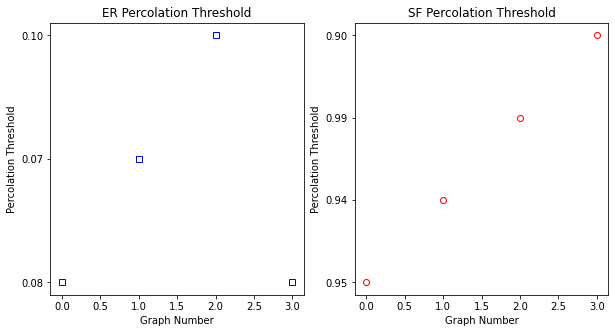

In [22]:
figure, axis = plt.subplots(1, 2,figsize=(10,5))


axis[0].plot(range(4), percolationER, marker="s", linestyle ="None", mfc= "none", mec = "b", label="Percolation Threshold")
axis[1].plot(range(4), percolationSF, marker= "o", linestyle ="None",mfc= "none",mec = "r", label="Percolation Threshold")

axis[0].set_title("ER Percolation Threshold")
axis[0].set_ylabel("Percolation Threshold")
axis[0].set_xlabel("Graph Number")

axis[1].set_title("SF Percolation Threshold")
axis[1].set_ylabel("Percolation Threshold")
axis[1].set_xlabel("Graph Number")

    
plt.show()

Thresholds are coherent. For ER networks and SF networks percolation threshold depends on node connectivity. If ER and SF networks node connectivty is high then their percolation threshold will be smaller compared to the newtworks with low node connectivity. Simply because highly connected nodes will create large component faster.